In [36]:
from solartwins import *
from condensation_temperature import * 

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
import scipy.optimize as op
import astropy.stats as astat
import math 

In [2]:
table= t.copy()

table.remove_column('O')
table.remove_column('C')

elements =[]
elnames = table.columns[3:64]
for n in elnames:
    if len(n) < 3 :
        elements.append(n)

In [3]:
#TI DATA 

In [4]:
x0 = (0.00984496, -0.03665832, -0.01235449) #one-dimensional optimization
restemp = scipy.optimize.minimize(nlnL, x0, args = (t['age'],t['Ti'],t['Ti_err']))

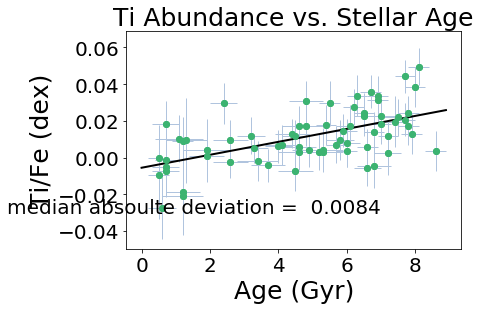

In [5]:
#plot of star age vs Ti abundance from above table - before removing temp trends

plt.scatter(t['age'], t['Ti'], c='mediumseagreen') 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Ti/Fe (dex)', fontsize=25)
plt.title('Ti Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
        
mbtemp= restemp['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mbtemp[0] * plot_xs + (mbtemp[1]), color = 'black', linewidth=2)
plt.text(7,-0.03,'median absoulte deviation = {0: .4f}'.format(astat.median_absolute_deviation(t['Ti'])),horizontalalignment='right', fontsize=20)

plt.errorbar(t['age'], t['Ti'], yerr= t['Ti_err'], xerr= t['age_err'], fmt='o', color='mediumseagreen',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('tivsage.png')

In [6]:
#REMOVING TEMPERATURE TRENDS

In [7]:
ti_con_temp = []
for ob in t['star_name']:
    abund = np.array(star_table(ob)['Abundance'])
    con_temp = np.array(star_table(ob)['Condensation Temp'])
    error = np.array(star_table(ob)['Abundance Error'])
    residu = residuals(con_temp, abund, error)
    ti_con_temp.append(residu[25])

x1 = (0.00135163, -0.00619703, -0.00397238) #one-dimensional optimization
reso = scipy.optimize.minimize(nlnL, x1, args = (t['age'], ti_con_temp, t['Ti_err']))

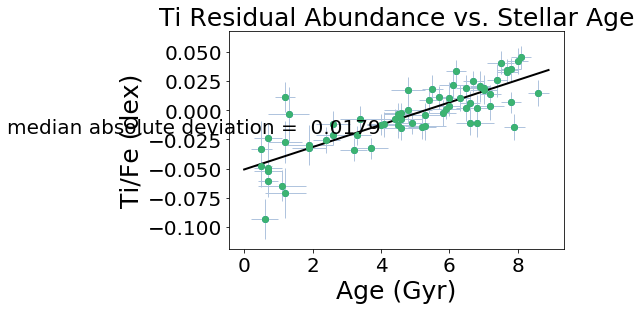

In [8]:
plt.scatter(t['age'], ti_con_temp) 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Ti/Fe (dex)', fontsize=25)
plt.title('Ti Residual Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)

mb= reso['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'black', linewidth=2)
plt.text(4,-.02,'median absolute deviation = {0: .4f}'.format(astat.median_absolute_deviation(ti_con_temp)),horizontalalignment='right', fontsize=20)


#error bars 
plt.errorbar(t['age'], ti_con_temp, yerr= t['Ti_err'], xerr= t['age_err'], fmt='o', color='mediumseagreen',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('tivsageresid.png')

In [9]:
#SR DATA

In [10]:
x0 = (0.00984496, -0.03665832, -0.01235449) #one-dimensional optimization
screstemp = scipy.optimize.minimize(nlnL, x0, args = (t['age'],t['Sc'],t['Sc_err']))

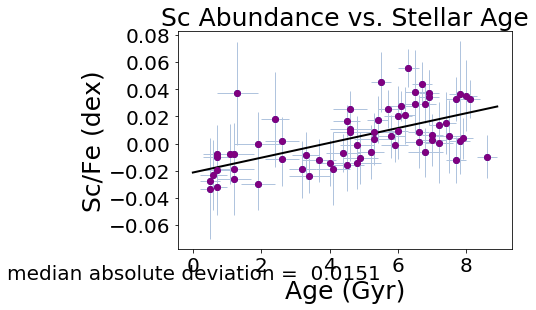

In [11]:
#plot of star age vs Mg abundance from above table - before removing temp trends

plt.scatter(t['age'], t['Sc']) 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Sc/Fe (dex)', fontsize=25)
plt.title('Sc Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)

mbtemp= screstemp['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mbtemp[0] * plot_xs + (mbtemp[1]), color = 'black', linewidth=2)
plt.text(5.5,-.1,'median absolute deviation = {0: .4f}'.format(astat.median_absolute_deviation(t['Sc'])),horizontalalignment='right', fontsize=20)

plt.errorbar(t['age'], t['Sc'], yerr= t['Sc_err'], xerr= t['age_err'], fmt='o', color='purple',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('scvsage.png')

In [12]:
sc_con_temp = []
for ob in t['star_name']:
    abund = np.array(star_table(ob)['Abundance'])
    con_temp = np.array(star_table(ob)['Condensation Temp'])
    error = np.array(star_table(ob)['Abundance Error'])
    residu = residuals(con_temp, abund, error)
    sc_con_temp.append(residu[26])

x0 = (0.00135163, -0.00619703, -0.00397238) #one-dimensional optimization
resosc = scipy.optimize.minimize(nlnL, x0, args = (t['age'], sc_con_temp, t['Sc_err']))

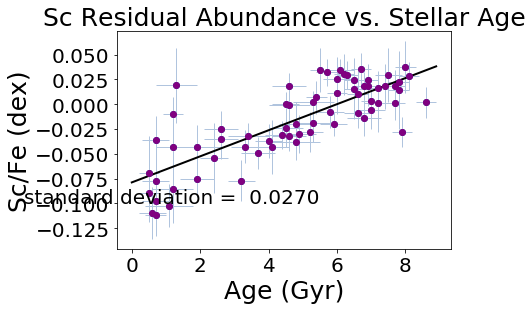

In [13]:
plt.scatter(t['age'], sc_con_temp) 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Sc/Fe (dex)', fontsize=25)
plt.title('Sc Residual Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)

mb= resosc['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'black', linewidth=2)
plt.text(5.5,-.1,'standard deviation = {0: .4f}'.format(astat.median_absolute_deviation(sc_con_temp)),horizontalalignment='right', fontsize=20)

plt.errorbar(t['age'], sc_con_temp, yerr= t['Sc_err'], xerr= t['age_err'], fmt='o', color='purple',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('scvsageresid.png')

In [14]:
#PR

In [15]:
x0 = (0.00984496, -0.03665832, -0.01235449) #one-dimensional optimization
restemp = scipy.optimize.minimize(nlnL, x0, args = (t['age'],t['Ba'],t['Ba_err']))

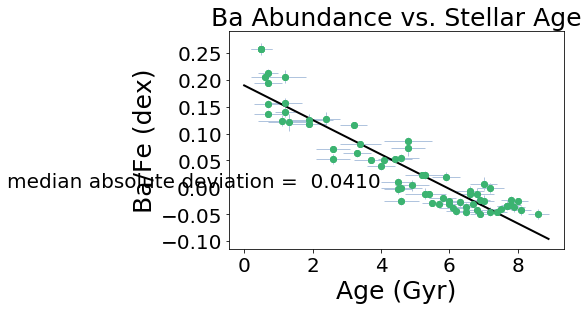

In [16]:
#plot of star age vs Ba abundance from above table - before removing temp trends

plt.scatter(t['age'], t['Ba'], c='mediumseagreen') 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Ba/Fe (dex)', fontsize=25)
plt.title('Ba Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
        
mbtemp= restemp['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mbtemp[0] * plot_xs + (mbtemp[1]), color = 'black', linewidth=2)
plt.text(4,0,'median absolute deviation = {0: .4f}'.format(astat.median_absolute_deviation(t['Ba'])),horizontalalignment='right', fontsize=20)

plt.errorbar(t['age'], t['Ba'], yerr= t['Ba_err'], xerr= t['age_err'], fmt='o', color='mediumseagreen',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('Bavsage.png')

In [17]:
Ba_con_temp = []
for ob in t['star_name']:
    abund = np.array(star_table(ob)['Abundance'])
    con_temp = np.array(star_table(ob)['Condensation Temp'])
    error = np.array(star_table(ob)['Abundance Error'])
    residu = residuals(con_temp, abund, error)
    Ba_con_temp.append(residu[16])

x1 = (0.00135163, -0.00619703, -0.00397238) #one-dimensional optimization
reso = scipy.optimize.minimize(nlnL, x1, args = (t['age'], Ba_con_temp, t['Ba_err']))

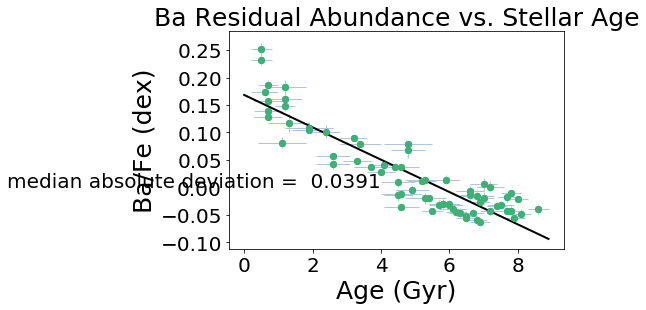

In [18]:
plt.scatter(t['age'], Ba_con_temp) 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Ba/Fe (dex)', fontsize=25)
plt.title('Ba Residual Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)

mb= reso['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'black', linewidth=2)
plt.text(4,0,'median absolute deviation = {0: .4f}'.format(astat.median_absolute_deviation(Ba_con_temp)),horizontalalignment='right', fontsize=20)


#error bars 
plt.errorbar(t['age'], Ba_con_temp, yerr= t['Ba_err'], xerr= t['age_err'], fmt='o', color='mediumseagreen',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('Bavsageresid.png')

In [19]:
#Y

In [20]:
x0 = (0.00984496, -0.03665832, -0.01235449) #one-dimensional optimization
restemp = scipy.optimize.minimize(nlnL, x0, args = (t['age'],t['Y'],t['Y_err']))

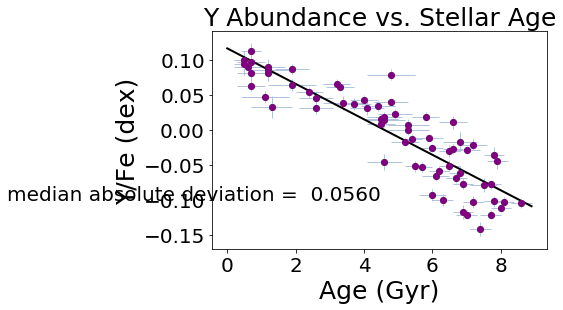

In [21]:
#plot of star age vs y abundance from above table - before removing temp trends

plt.scatter(t['age'], t['Y'], c='mediumseagreen') 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Y/Fe (dex)', fontsize=25)
plt.title('Y Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
        
mbtemp= restemp['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mbtemp[0] * plot_xs + (mbtemp[1]), color = 'black', linewidth=2)
plt.text(4.5,-0.1,'median absolute deviation = {0: .4f}'.format(astat.median_absolute_deviation(t['Y'])),horizontalalignment='right', fontsize=20)

plt.errorbar(t['age'], t['Y'], yerr= t['Y_err'], xerr= t['age_err'], fmt='o', color='purple',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('yvsage.png')

In [22]:
y_con_temp = []
for ob in t['star_name']:
    abund = np.array(star_table(ob)['Abundance'])
    con_temp = np.array(star_table(ob)['Condensation Temp'])
    error = np.array(star_table(ob)['Abundance Error'])
    residu = residuals(con_temp, abund, error)
    y_con_temp.append(residu[14])

x1 = (0.00135163, -0.00619703, -0.00397238) #one-dimensional optimization
reso = scipy.optimize.minimize(nlnL, x1, args = (t['age'], y_con_temp, t['Y_err']))

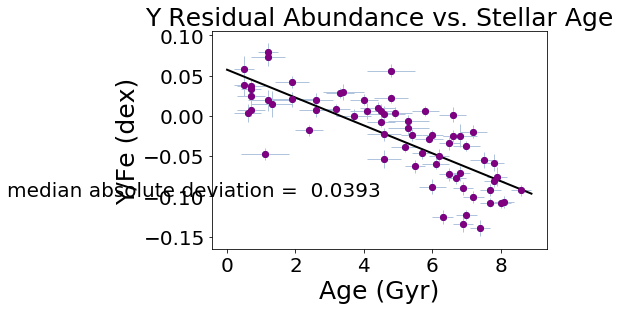

In [23]:
plt.scatter(t['age'], y_con_temp) 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Y/Fe (dex)', fontsize=25)
plt.title('Y Residual Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)

mb= reso['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'black', linewidth=2)
plt.text(4.5,-.1,'median absolute deviation = {0: .4f}'.format(astat.median_absolute_deviation(y_con_temp)),horizontalalignment='right', fontsize=20)


#error bars 
plt.errorbar(t['age'], y_con_temp, yerr= t['Y_err'], xerr= t['age_err'], fmt='o', color='purple',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('yvsageresid.png')

slopes_before =[]
el_con_temp =[]
for each, value in enumerate(elements):
    for ob in t['star_name']:
        abund = np.array(star_table(ob)['Abundance'])
        con_temp = np.array(star_table(ob)['Condensation Temp'])
        error = np.array(star_table(ob)['Abundance Error'])
        residu = residuals(con_temp, abund, error)
        el_con_temp.append(residu[each])
    slopes_before.append(find_m_b(t['age'], el_con_temp, t['age_err']))
    con_temp = []

In [24]:
slope_before = []
slope_after = []
for each, element in enumerate(elements):
    x0 = (0.00984496, -0.03665832, -0.01235449) #one-dimensional optimization
    restemp = scipy.optimize.minimize(nlnL, x0, args = (t['age'],t[element],t[element+ '_err']))
    mbrestemp= restemp['x']
    slope_before.append(mbrestemp[0])
    
    el_con_temp = []   
    for ob in t['star_name']:
        abund = np.array(star_table(ob)['Abundance'])
        con_temp = np.array(star_table(ob)['Condensation Temp'])
        error = np.array(star_table(ob)['Abundance Error'])
        residu = residuals(con_temp, abund, error)
        el_con_temp.append(residu[each])

    x1 = (0.00135163, -0.00619703, -0.00397238) #one-dimensional optimization
    reso = scipy.optimize.minimize(nlnL, x1, args = (t['age'], el_con_temp, t[element + '_err']))
    mbtemp= reso['x']
    slope_after.append(mbtemp[0])
    el_con_temp = []
    reso = 0
    x1=(0,0,0)
    
slope_before =np.array(slope_before)
slope_after= np.array(slope_after)
diff = slope_before-slope_after

In [25]:
diff

array([ 4.27412402e-04,  1.03016812e-02,  4.31388781e-04, -7.44686513e-03,
        1.24341373e-03,  1.85395371e-02, -4.24219459e-03, -2.16441492e-03,
        5.20895563e-03,  1.43827268e-04,  1.10735060e-04,  8.38217595e-03,
        1.59135241e-02, -2.84943383e-03, -8.06103374e-03, -1.01464099e-02,
       -2.61592766e-03, -6.15106532e-03, -3.23237346e-03, -5.86165939e-03,
       -6.51959298e-03, -5.83733403e-03, -1.35221671e-05, -7.91307721e-03,
       -7.38969400e-03, -6.03334029e-03, -7.68133395e-03,  1.08676408e-03])

In [26]:
elements

['Fe',
 'Na',
 'Mg',
 'Al',
 'Si',
 'S',
 'Ca',
 'V',
 'Mn',
 'Co',
 'Ni',
 'Cu',
 'Zn',
 'Sr',
 'Y',
 'Zr',
 'Ba',
 'La',
 'Ce',
 'Pr',
 'Nd',
 'Sm',
 'Eu',
 'Gd',
 'Dy',
 'Ti',
 'Sc',
 'Cr']

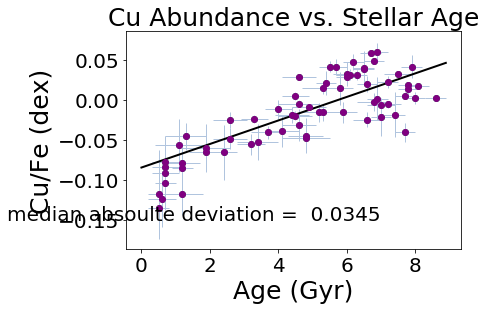

In [27]:
#plot of star age vs Cu abundance from above table - before removing temp trends
x0 = (0.00984496, -0.03665832, -0.01235449) #one-dimensional optimization
restemp = scipy.optimize.minimize(nlnL, x0, args = (t['age'],t['Cu'],t['Cu_err'])) 

plt.scatter(t['age'], t['Cu'], c='mediumseagreen') 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Cu/Fe (dex)', fontsize=25)
plt.title('Cu Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
        
mbtemp= restemp['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mbtemp[0] * plot_xs + (mbtemp[1]), color = 'black', linewidth=2)
plt.text(7,-0.15,'median absoulte deviation = {0: .4f}'.format(astat.median_absolute_deviation(t['Cu'])),horizontalalignment='right', fontsize=20)

plt.errorbar(t['age'], t['Cu'], yerr= t['Cu_err'], xerr= t['age_err'], fmt='o', color='purple',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('Cuvsage.png')

In [28]:
Cu_con_temp = []
for ob in t['star_name']:
    abund = np.array(star_table(ob)['Abundance'])
    con_temp = np.array(star_table(ob)['Condensation Temp'])
    error = np.array(star_table(ob)['Abundance Error'])
    residu = residuals(con_temp, abund, error)
    Cu_con_temp.append(residu[11])

x1 = (0.00135163, -0.00619703, -0.00397238) #one-dimensional optimization
reso = scipy.optimize.minimize(nlnL, x1, args = (t['age'], Cu_con_temp, t['Cu_err']))

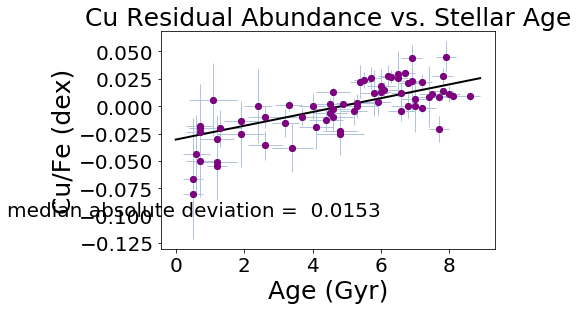

In [29]:
plt.scatter(t['age'], Cu_con_temp) 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Cu/Fe (dex)', fontsize=25)
plt.title('Cu Residual Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)

mb= reso['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'black', linewidth=2)
plt.text(6,-.1,'median absolute deviation = {0: .4f}'.format(astat.median_absolute_deviation(Cu_con_temp)),horizontalalignment='right', fontsize=20)


#error bars 
plt.errorbar(t['age'], Cu_con_temp, yerr= t['Cu_err'], xerr= t['age_err'], fmt='o', color='purple',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('Cuvsageresid.png')

In [30]:
for each, element in enumerate(elements):
    x0 = (0.00984496, -0.03665832, -0.01235449) #one-dimensional optimization
    restemp = scipy.optimize.minimize(nlnL, x0, args = (t['age'],t[element],t[element + '_err']))
    #plot of star age vs abundance from above table - before removing temp trends

    plt.scatter(t['age'], t[element], c='mediumseagreen') 
    plt.xlabel('Age (Gyr)',fontsize=25)
    plt.ylabel(element +'/Fe (dex)', fontsize=25)
    plt.title(element + 'Abundance vs. Stellar Age', fontsize=25)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
        
    mbtemp= restemp['x']
    plot_xs = np.arange(0, 9, .1)
    plt.plot(plot_xs, mbtemp[0] * plot_xs + (mbtemp[1]), color = 'black', linewidth=2)
    plt.text(4,0,'median absolute deviation = {0: .4f}'.format(astat.median_absolute_deviation(t[element])),horizontalalignment='right', fontsize=20)

    plt.errorbar(t['age'], t[element], yerr= t[element+ '_err'], xerr= t['age_err'], fmt='o', color='mediumseagreen',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

    plt.savefig(element + 'vsage.png')
    plt.close()

In [31]:
for each, element in enumerate(elements):
    el_con_temp = []
    for ob in t['star_name']:
        abund = np.array(star_table(ob)['Abundance'])
        con_temp = np.array(star_table(ob)['Condensation Temp'])
        error = np.array(star_table(ob)['Abundance Error'])
        residu = residuals(con_temp, abund, error)
        el_con_temp.append(residu[each])

    x1 = (0.00135163, -0.00619703, -0.00397238) #one-dimensional optimization
    reso = scipy.optimize.minimize(nlnL, x1, args = (t['age'], el_con_temp, t[element + '_err']))
    
    plt.scatter(t['age'], el_con_temp) 
    plt.xlabel('Age (Gyr)',fontsize=25)
    plt.ylabel(element + '/Fe (dex)', fontsize=25)
    plt.title(element +'Residual Abundance vs. Stellar Age', fontsize=25)
    plt.xticks(size = 20)
    plt.yticks(size = 20)

    mb= reso['x']
    plot_xs = np.arange(0, 9, .1)
    plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'black', linewidth=2)
    plt.text(4,0,'median absolute deviation = {0: .4f}'.format(astat.median_absolute_deviation(el_con_temp)),horizontalalignment='right', fontsize=20)


    #error bars 
    plt.errorbar(t['age'], el_con_temp, yerr= t[element + '_err'], xerr= t['age_err'], fmt='o', color='mediumseagreen',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

    plt.savefig(element+'vsageresid.png')
    el_con_temp= []
    plt.close()

In [32]:
#ZR

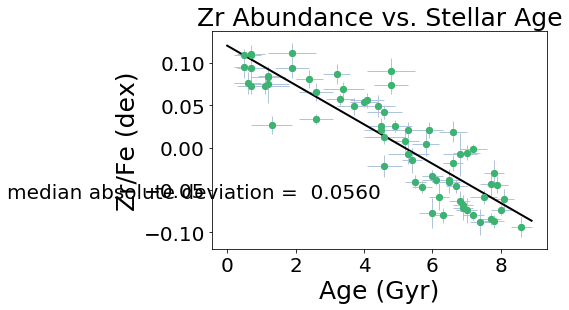

In [33]:
x0 = (0.00984496, -0.03665832, -0.01235449) #one-dimensional optimization
restemp = scipy.optimize.minimize(nlnL, x0, args = (t['age'],t['Zr'],t['Zr_err']))
#plot of star age vs Zr abundance from above table - before removing temp trends

plt.scatter(t['age'], t['Zr'], c='mediumseagreen') 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Zr/Fe (dex)', fontsize=25)
plt.title('Zr Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)
        
mbtemp= restemp['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mbtemp[0] * plot_xs + (mbtemp[1]), color = 'black', linewidth=2)
plt.text(4.5,-.06,'median absolute deviation = {0: .4f}'.format(astat.median_absolute_deviation(t['Zr'])),horizontalalignment='right', fontsize=20)

plt.errorbar(t['age'], t['Zr'], yerr= t['Zr_err'], xerr= t['age_err'], fmt='o', color='mediumseagreen',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('Zrvsage.png')


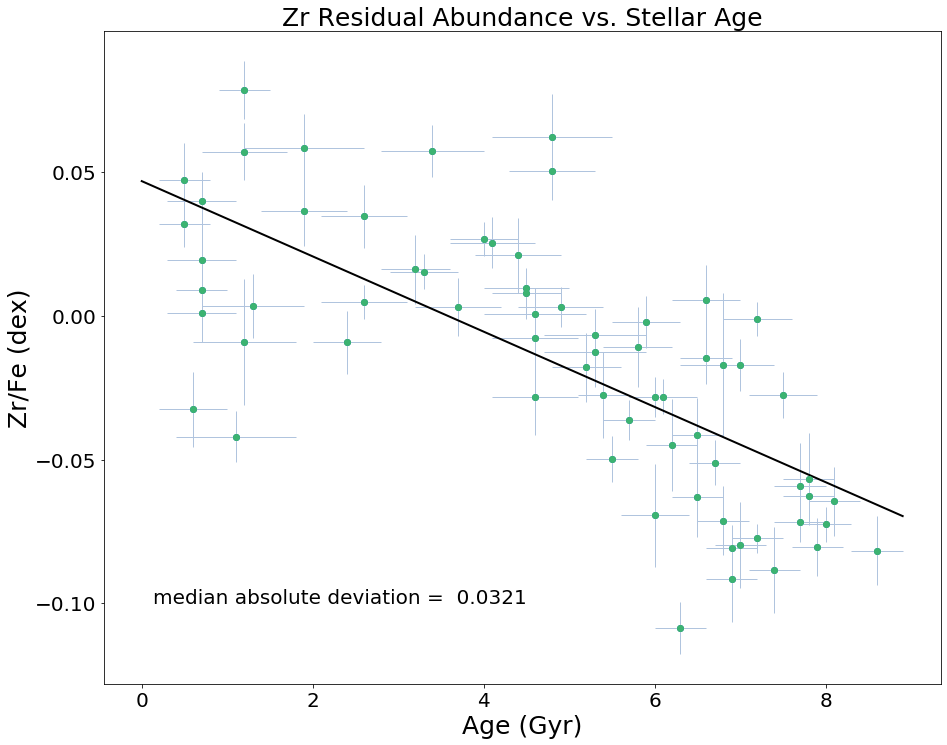

In [39]:
zr_con_temp = []
for ob in t['star_name']:
    abund = np.array(star_table(ob)['Abundance'])
    con_temp = np.array(star_table(ob)['Condensation Temp'])
    error = np.array(star_table(ob)['Abundance Error'])
    residu = residuals(con_temp, abund, error)
    zr_con_temp.append(residu[15])

x1 = (0.00135163, -0.00619703, -0.00397238) #one-dimensional optimization
reso = scipy.optimize.minimize(nlnL, x1, args = (t['age'], zr_con_temp, t['Zr_err']))
    
plt.scatter(t['age'], zr_con_temp) 
plt.xlabel('Age (Gyr)',fontsize=25)
plt.ylabel('Zr/Fe (dex)', fontsize=25)
plt.title('Zr Residual Abundance vs. Stellar Age', fontsize=25)
plt.xticks(size = 20)
plt.yticks(size = 20)

mb= reso['x']
plot_xs = np.arange(0, 9, .1)
plt.plot(plot_xs, mb[0] * plot_xs + (mb[1]), color = 'black', linewidth=2)
plt.text(4.5,-.10,'median absolute deviation = {0: .4f}'.format(astat.median_absolute_deviation(zr_con_temp)),horizontalalignment='right', fontsize=20)


#error bars 
plt.errorbar(t['age'], zr_con_temp, yerr= t['Zr_err'], xerr= t['age_err'], fmt='o', color='mediumseagreen',
                 ecolor='lightsteelblue', elinewidth=1,capsize=0)

plt.savefig('Zrvsageresid.png')